In [40]:
from ctm_python_client.core.workflow import *
from ctm_python_client.core.comm import *
from ctm_python_client.core.credential import *
from aapi import *
from ctm_python_client.ext.viz import get_graph
#from IPython.display import display, JSON
import os

BASE_PATH = os.path.abspath("")
host="centos802"
myport="8443"
with open(BASE_PATH + "/secrets_centos802", "r") as fp:
        ctm_user = fp.readline().strip()
        ctm_pwd = fp.readline().strip()

my_environment = Environment.create_onprem(host, port=myport,username=ctm_user,password=ctm_pwd)
myCTM="centos802"
myfolder="mpe-loop"
mySITE = "Site1"
myrun_as="emuser"
myagent="linux"
myapplication="MPE"
mysubapplication="demo5"
mycommand="date"

# Creation du Workspace
workflow = Workflow(my_environment,
                    WorkflowDefaults(application=myapplication,
                                     run_as=myrun_as,
                                     host=myagent,
                                     sub_application=mysubapplication)
                    )


# Folder
folder = Folder(myfolder,
                site_standard=mySITE,
                controlm_server=myCTM,
                description='Loop in Python',
                order_method=Folder.OrderMethod.Manual
                )
workflow.add(folder)
jobyy=""
start=JobDummy("start")
end=JobDummy("end")
mylimit=11
for x in range(1,mylimit):
  for y in range(0,mylimit):
       a=str(x)+str(y)
       a=f"{x:0>4}"
       b=f"{y:0>4}"
       yy=a+b
       jobprev=jobyy
       jobyy=JobCommand("job-"+ yy,
                        command=mycommand)
       if y == 0:
            workflow.chain([start,jobyy],inpath=myfolder)
       elif y == mylimit-1:
            workflow.chain([jobprev,jobyy,end],inpath=myfolder)
       else:
            workflow.chain([jobprev,jobyy],inpath=myfolder)

The workflow is valid!


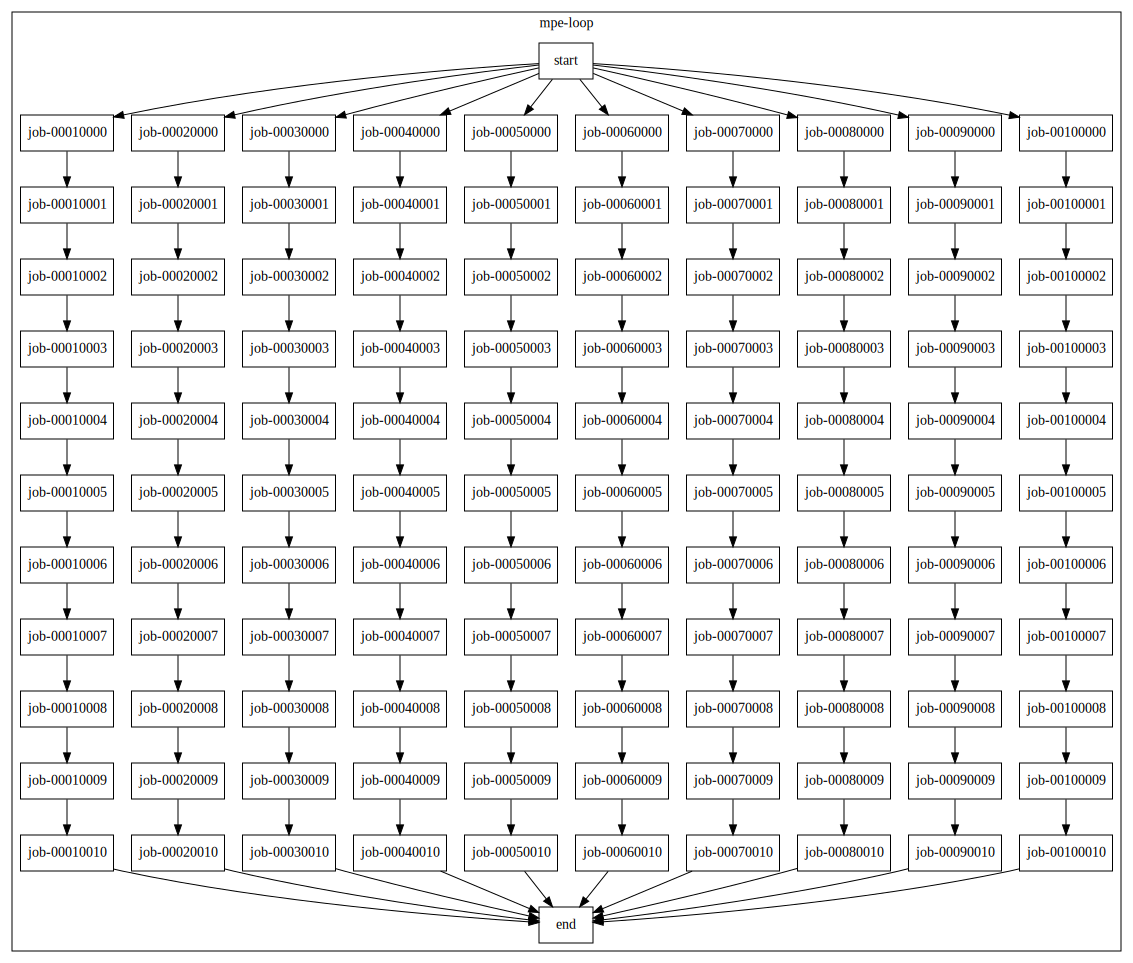

In [41]:
if workflow.build().is_ok():
    print('The workflow is valid!')

else:
    print('The workflow is NOT valid!')
    print(workflow.build().errors)

#workflow.dumps_json(indent=4)
get_graph(workflow)

In [42]:
if workflow.deploy().is_ok():
    print('The workflow was deployed to Control-M!')
else:
    print('The workflow is NOT deployed!')
    print(workflow.deploy().errors)

The workflow was deployed to Control-M!


In [39]:
#print('Run')
#run = workflow.run()
run.print_statuses()

Run Status
--------------------------------------------------
    mpe-loop  ..........................  Executing
    START  .............................  Ended OK
    job-00010000  ......................  Ended OK
    job-00010001  ......................  Ended OK
    job-00010002  ......................  Ended OK
    job-00010003  ......................  Ended OK
    job-00010004  ......................  Ended OK
    job-00010005  ......................  Ended OK
    job-00010006  ......................  Ended OK
    job-00010007  ......................  Executing
    job-00010008  ......................  Wait Condition
    job-00010009  ......................  Wait Condition
    job-00010010  ......................  Wait Condition
    job-00010011  ......................  Wait Condition
    job-00010012  ......................  Wait Condition
    job-00010013  ......................  Wait Condition
    job-00010014  ......................  Wait Condition
    job-00010015  .........